**TIME SERIES FORECASTING USING ARIMA MODEL**

ARIMA is the combination of 3 parts 
- AR -> Auto Regression
- I  -> Integration
- MA -> Moving Average

**Steps to be followed**
- Plotting of data
- check and if required make the data stationary
- plot the correlation and autocorrelation charts
- make the ARIMA Model
- Use the model to make Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')
dataset.columns = ['time','sales']

In [3]:
print(dataset.shape)
print(dataset.columns)
dataset.head()

(107, 2)
Index(['time', 'sales'], dtype='object')


,time,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
dataset.tail()

,time,sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
# Handling the null values
print(dataset.isnull().sum())
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

time     1
sales    2
dtype: int64
time     0
sales    0
dtype: int64


In [6]:
# Converting the month column to datetime format
dataset['time'] = pd.to_datetime(dataset['time'])

In [7]:
# Setting the index as time
dataset.set_index('time',inplace=True)
dataset.head()

,sales
time,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


**PLOTTING OF THE DATA**

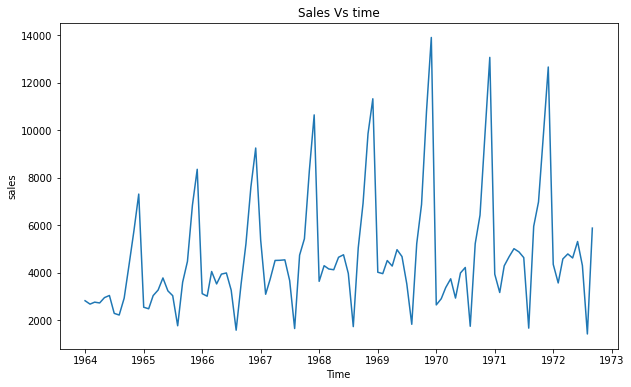

In [8]:
plt.figure(figsize=(10,6))
plt.xlabel('Time')
plt.ylabel('sales')
plt.title("Sales Vs time")
plt.plot(dataset['sales'])

From the above plot we can see the data is seasonal in nature

**TEST FOR STATIONARY NATURE OF THE DATA**

In [9]:
#Difference in data
dataset['first shift'] = dataset['sales'] - dataset['sales'].shift(1)
dataset.head()

,sales,first shift
time,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [10]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("stationary")
    else:
        print("non-stationary ")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
adfuller_test(dataset['sales'])

ADF Test Statistic : -1.833593056327624
p-value : 0.36391577166024447
#Lags Used : 11
Number of Observations Used : 93
non-stationary 


In [12]:
adfuller_test(dataset['first shift'].dropna(axis=0))

ADF Test Statistic : -7.189896448050999
p-value : 2.519620447387081e-10
#Lags Used : 11
Number of Observations Used : 92
stationary


As we can see with 1 shift in data, the data points became stationary

**Plotting autocorrelation**

[]

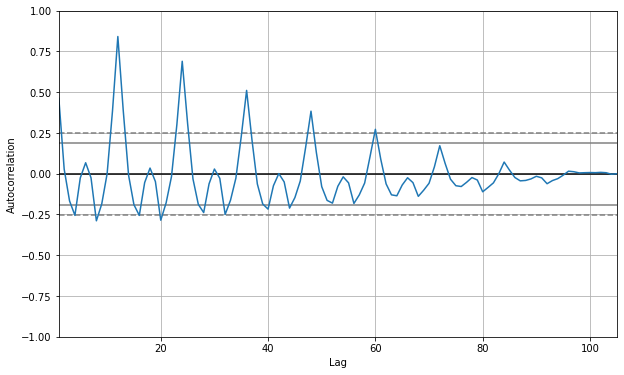

In [15]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,6))
autocorrelation_plot(dataset['sales'])
plt.plot()

Now we have to find out the value of P,D,Q for the ARIMA Model

**Plotting Auto correlation and partial correlation plot**

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


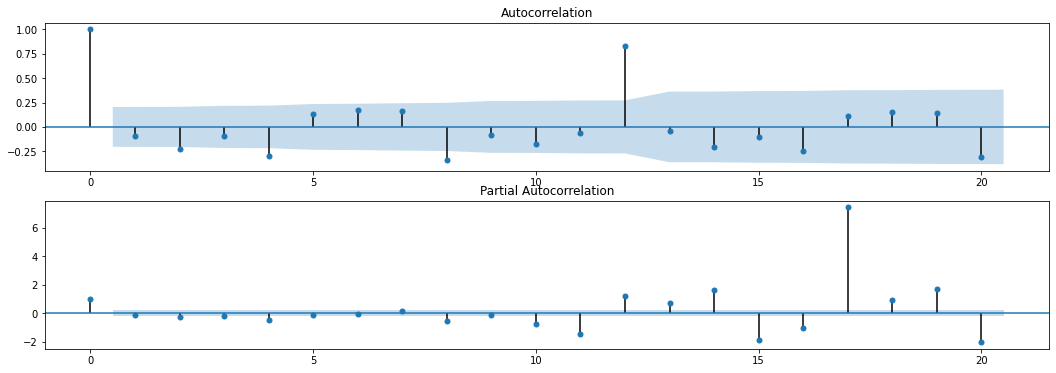

In [28]:
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(211)
fig = plot_acf(dataset['first shift'].iloc[13:],ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(dataset['first shift'].iloc[13:],ax2)


In [29]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [31]:
model=ARIMA(dataset['sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 18 Jan 2021   AIC                           1910.251
Time:                        05:51:11   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7848     12.405      1.837      0.069      -1.529      47.099
ar.L1.D.sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

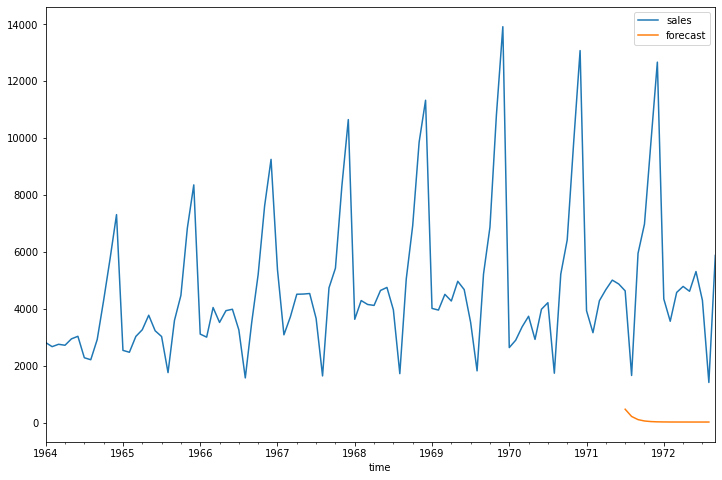

In [32]:

dataset['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
dataset[['sales','forecast']].plot(figsize=(12,8))

Predictions are not in pattern as we have used non seasonal model

In [52]:
# seasonal SARIMAX model
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(dataset['sales'],order=(1,1,1),seasonal_order= (1,1,1,12))
res = model.fit()
res.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Mon, 18 Jan 2021   AIC                           1486.804
Time:                                    06:06:07   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (Q):                       40.24   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.46   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

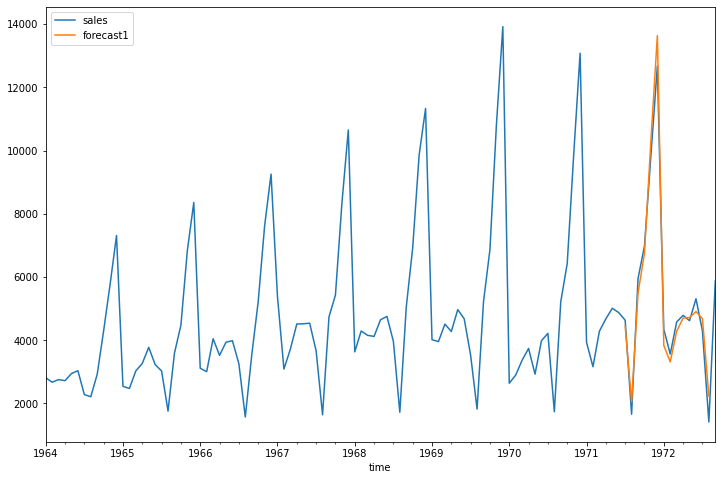

In [53]:
dataset['forecast1']=res.predict(start=90,end=103,dynamic=True)
dataset[['sales','forecast1']].plot(figsize=(12,8))